# K-Means 
### Import packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

### Read the dataset

In [3]:
coordinates = pd.read_csv("https://raw.githubusercontent.com/jupyter/docker-demo-images/master/datasets/cluster/xclara.csv", index_col=0)
coordinates = coordinates.as_matrix()
coordinates

array([[  2.072345,  -3.241693],
       [ 17.93671 ,  15.78481 ],
       [  1.083576,   7.319176],
       ...,
       [ 64.46532 , -10.50136 ],
       [ 90.72282 , -12.25584 ],
       [ 64.87976 , -24.87731 ]])

In [4]:
n, feature_size = coordinates.shape
print("Dataset size: ", n)
print("Feature size: ", feature_size)

Dataset size:  3000
Feature size:  2


### Visualize the dataset

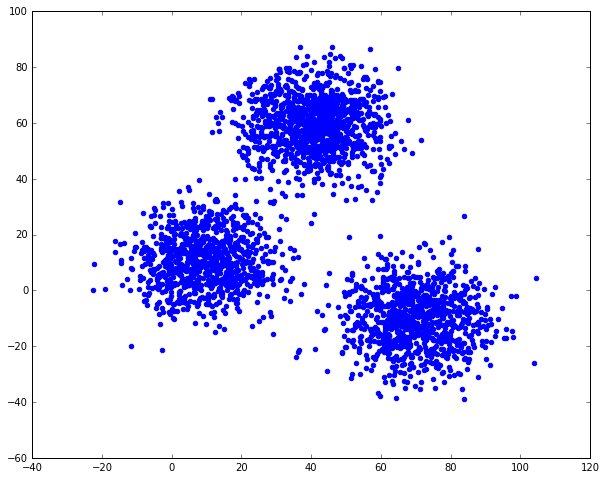

In [5]:
plt.rcParams['figure.figsize'] = [10, 8]
plt.scatter(coordinates[:,0], coordinates[:,1], edgecolors='face')

### Helper functions

In [8]:
def generate_centroids(K, feature_size):
    centroids = np.zeros((K, feature_size))
    for i in range(feature_size):
        centroids[:,i] = np.random.uniform(np.min(coordinates[:,i]), np.max(coordinates[:,i]), size=K)                                 
    return centroids

In [9]:
def centroid_changed(previous, current):
    return not np.array_equal(previous, current)

In [10]:
def distance(a,b): # euclidean distance
    return np.sqrt(np.sum((a-b)**2))

In [11]:
def nearest_centroid(data_point, current_centroids):  
    distances = []
    for centroid in current_centroids:
        distances.append(distance(data_point, centroid))
    return np.argmin(distances), np.min(distances)

### Optional function
* Calculates the cost:
$\sum_{i=1}^{k}\sum_{x\in S_i}\left \|x-\mu_i \right \|^2$
* You don't have to write this function to implement k-means




In [12]:
def cost(coordinates, cluster, K):
    cost = 0
    for k in range(K):
        indices = np.where(cluster == k)
        if len(indices[0]) > 0:
            centroid = np.mean(coordinates[indices], axis=0)
            cost += distance(coordinates[indices], centroid)**2 # sum of squared euclidean distance
    return cost

### K-means algorithm

In [13]:
def kmeans(coordinates, K, max_iteration):
    current_centroids = generate_centroids(K, feature_size)
    previous_centroids = None
    cluster = np.zeros(len(coordinates))
    iteration = 1

    fig = plt.figure(figsize=(6,120))

    while centroid_changed(previous_centroids, current_centroids) and iteration <= max_iteration:
        for i in range(len(coordinates)):
            cluster[i],_ = nearest_centroid(coordinates[i], current_centroids)
        
        wcss = cost(coordinates, cluster, K)
        ax = fig.add_subplot(max_iteration,1,iteration)
        ax.set_title("%s. iteration (Cost: %s)" % (iteration, wcss))
        ax.scatter(coordinates[:,0], coordinates[:,1], c=np.copy(cluster), cmap='rainbow', edgecolors='face')
        ax.scatter(np.array(current_centroids)[:,0],np.array(current_centroids)[:,1], s=200, c='k', marker='*', edgecolors='face')

        previous_centroids = np.copy(current_centroids)

        for k in range(K):
            indices = np.where(cluster == k)
            if len(indices[0]) > 0:
                current_centroids[k] = np.mean(coordinates[indices], axis=0)
        
        iteration += 1
    
    return current_centroids, wcss

### Run

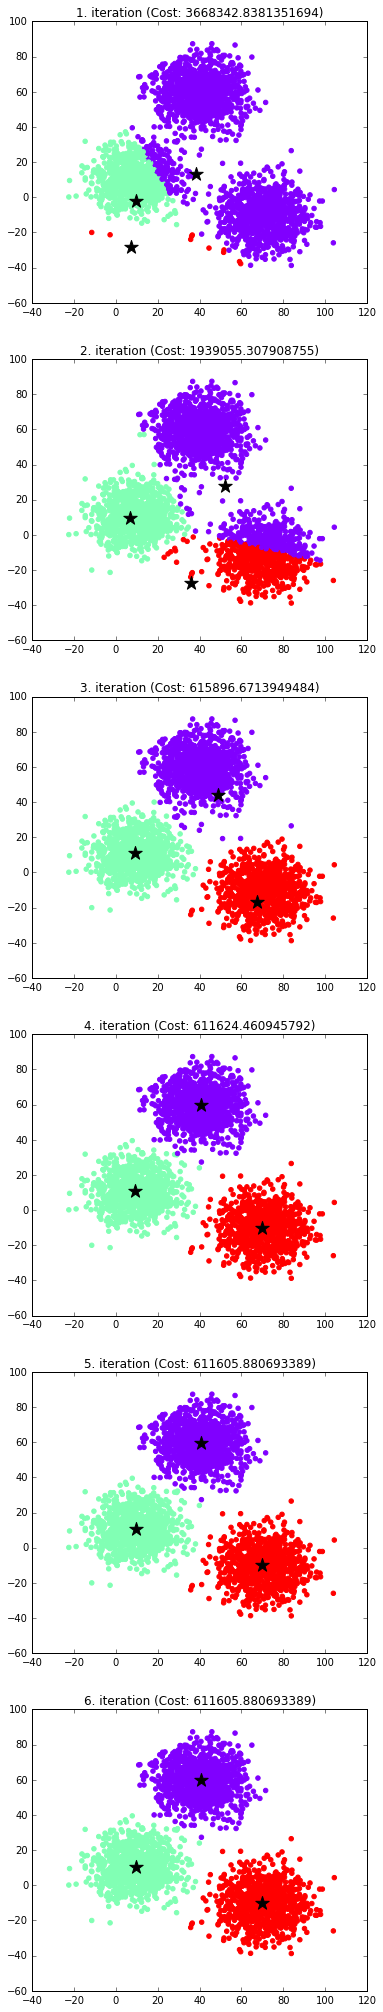

In [14]:
centroids, wcss = kmeans(coordinates, 3, 20)